## Variables categóricas en Regresión Lineal

A continuación vamos a estudiar la interpretación geométrica del efecto de las variables categóricas en la Regresión Lineal. 

## 1- Generación de datos

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Inicializamos el dataframe donde se encontraran los datos generados
data = pd.DataFrame()

# Seteamos el RandomState para que todo el proceso sea reproducible
rand = np.random.RandomState(1)

# Una variable continua, 200 números enteros
data['x_1'] = rand.randint(0,60,200)

# Una variable dummy gender, 200 números entre 0 y 1
data['x_gender'] = rand.randint(0,2,data['x_1'].size)

# Ruido aleatorio
delta = rand.uniform(-10, 10, data['x_1'].size)

# Expresión para la variable dependiente y
data['Y'] = 0.4 * data['x_1']  + 10 * data['x_gender'] + delta

data.head()

,x_1,x_gender,Y
0,37,1,25.790958
1,43,0,25.723629
2,12,1,23.174669
3,8,1,11.097512
4,9,1,22.865251


## 2- Visualización

A continuación hacemos un scatterplot de los datos generados.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


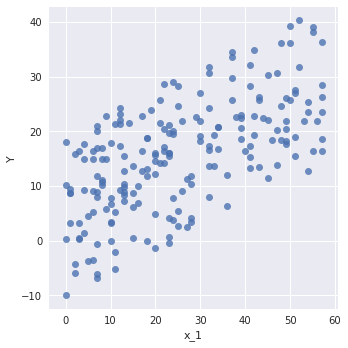

In [2]:
sns.lmplot('x_1', "Y", data=data, fit_reg=False);

#### En principio, X e Y parecen mantenter una relación lineal. Veamos cómo influye la variable categórica gender en el gráfico:

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


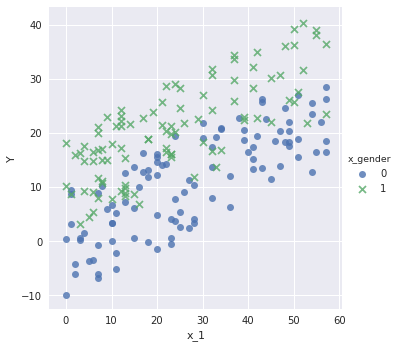

In [3]:
sns.lmplot('x_1', "Y",  hue = 'x_gender', data=data, markers=['o','x'],fit_reg=False);

### 2- Ajustando un modelo sin Dummy
A continuación vamos a ajustar un modelo, visualizar los resultados y evaluar la performance del mismo sobre datos desconocidos para determinar si tenemos una ganancia significativa de calidad de la predicción incluyendo o no la variable Dummy.  


In [4]:
# Importamos el modelo a utilizar
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### 2.1 Visualizando el modelo sobre x_1

Ajustemos el modelo utilizando una única variable x_1 y visualicemos el resultado:

In [5]:
# Se realiza el ajuste dando solo a la variable x_1 como parámetro
model.fit(data[['x_1']],data['Y'])

# Se concatena al dataset
data['Y_pred_(con x_1)'] = model.predict(data[['x_1']])
data.sample(5)

,x_1,x_gender,Y,Y_pred_(con x_1)
62,24,0,7.816227,15.146196
71,41,0,13.266925,21.512990
121,52,1,31.680202,25.632680
98,10,0,3.337600,9.902953
115,13,1,9.873323,11.026505


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


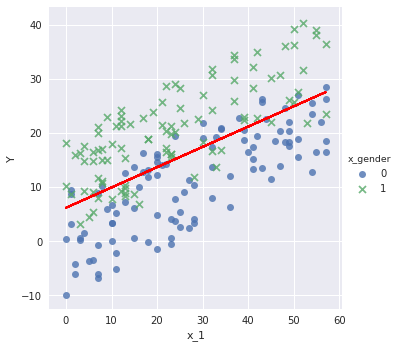

In [6]:
# Visualizamos x_1 contra Y, que son los datos generados originales, separados por género.
sns.lmplot('x_1', 'Y', hue = 'x_gender', data = data, markers=['o','x'], fit_reg = False);

# Superponemos nuestra predicción al scatter con los valores de origen.
plt.plot(data['x_1'],data['Y_pred_(con x_1)'], c = 'red');

### 2.2 Ahora evaluemos la performance de este método sobre datos nuevos
El score viene dado en MSE. Si queremos observar el resultado en unidades **y** tenemos que computar la raíz cuadrada.

In [7]:
#importamos la función de score
from sklearn.model_selection import cross_val_score

scores = cross_val_score( model, data[['x_1']], data['Y'], 
                         cv = 5, scoring = 'neg_mean_squared_error')

scores

array([-83.59040716, -59.90212422, -64.29364624, -45.56004542, -66.5629475 ])

#### (*) Nota: Los scores son negativos por una decisión de diseño de scikitlearn: para que puedan ser maximizados en un función sin aplicarles ninguna transformación.

In [8]:
# Aquí tenemos el score final del modelo (sin hacer distinción por género)
np.sqrt(np.mean(-scores))

7.9988645512349441

## 3 Ajustando un modelo con variable Dummy

### 3.1 Visualizando el modelo sobre ambas variables
Ajustemos el modelo utilizando ambas variables y visualicemos el resultado:

In [9]:
model_dummy = LinearRegression()
# Se realiza un ajuste del modelo utilizando x_gender como variable dummy.
model_dummy.fit(data[['x_1','x_gender']], data['Y'])

# Se obtiene una nueva predicción incorporando la variable dummy.
data['Y_pred_(con x_1 y x_gender)'] = model_dummy.predict(data[['x_1','x_gender']])  

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


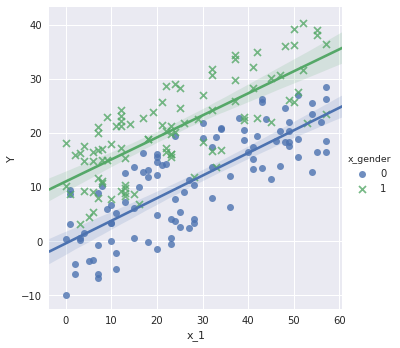

In [10]:
# Veamos los gráficos superpuestos de los valores reales y los predichos
sns.lmplot('x_1', 'Y', data=data, hue='x_gender', markers=['o','x'], fit_reg = model_dummy);

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


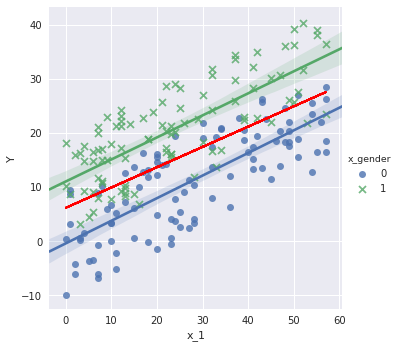

In [11]:
# Superponemos nuestra predicción sin dummies al (en rojo), al ajuste con la variable dummy.
sns.lmplot('x_1', 'Y', data=data, hue='x_gender', markers=['o','x'], fit_reg = model_dummy);
plt.plot(data['x_1'],data['Y_pred_(con x_1)'], c = 'red');

#### Aparentemente el ajuste de este nuevo modelo parece explicar mejor los datos. 

#### Evaluemos ahora la performance sobre datos no observados:

In [12]:
from sklearn.model_selection import cross_val_score
scores_dummy = cross_val_score(model_dummy, 
                         data[['x_1','x_gender']], data['Y'], 
                         cv=5, scoring='neg_mean_squared_error')
scores_dummy

array([-37.55095745, -26.89194315, -29.43576606, -39.05281904, -34.34298249])

In [13]:
# El score final del modelo
np.sqrt(np.mean(-scores_dummy))

5.784020542656048